# Introduction

In this notebook we will walk through the process of analyzing and modeling an ML model.

First, we will import necessary libraries and load the dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('wdbc.data', header=None, names=['id', 'diagnosis', 'radius_mean', 'texture_mean', 
                                                  'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                                                  'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                                                  'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                                                  'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
                                                  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
                                                  'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                                                  'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_ordered = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst',
         'texture_mean', 'texture_se', 'texture_worst',
         'perimeter_mean', 'perimeter_se', 'perimeter_worst',
         'area_mean', 'area_se', 'area_worst',
         'smoothness_mean', 'smoothness_se', 'smoothness_worst',
         'compactness_mean', 'compactness_se', 'compactness_worst',
         'concavity_mean', 'concavity_se', 'concavity_worst',
         'concave_points_mean', 'concave_points_se', 'concave_points_worst',
         'symmetry_mean', 'symmetry_se', 'symmetry_worst',
         'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_ordered.head()

,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,M,17.99,1.0950,25.38,10.38,0.9053,17.33,122.80,8.589,184.60,1001.0,153.40,2019.0,0.11840,0.006399,0.1622,0.27760,0.04904,0.6656,0.3001,0.05373,0.7119,0.14710,0.01587,0.2654,0.2419,0.03003,0.4601,0.07871,0.006193,0.11890
1,M,20.57,0.5435,24.99,17.77,0.7339,23.41,132.90,3.398,158.80,1326.0,74.08,1956.0,0.08474,0.005225,0.1238,0.07864,0.01308,0.1866,0.0869,0.01860,0.2416,0.07017,0.01340,0.1860,0.1812,0.01389,0.2750,0.05667,0.003532,0.08902
2,M,19.69,0.7456,23.57,21.25,0.7869,25.53,130.00,4.585,152.50,1203.0,94.03,1709.0,0.10960,0.006150,0.1444,0.15990,0.04006,0.4245,0.1974,0.03832,0.4504,0.12790,0.02058,0.2430,0.2069,0.02250,0.3613,0.05999,0.004571,0.08758
3,M,11.42,0.4956,14.91,20.38,1.1560,26.50,77.58,3.445,98.87,386.1,27.23,567.7,0.14250,0.009110,0.2098,0.28390,0.07458,0.8663,0.2414,0.05661,0.6869,0.10520,0.01867,0.2575,0.2597,0.05963,0.6638,0.09744,0.009208,0.17300
4,M,20.29,0.7572,22.54,14.34,0.7813,16.67,135.10,5.438,152.20,1297.0,94.44,1575.0,0.10030,0.011490,0.1374,0.13280,0.02461,0.2050,0.1980,0.05688,0.4000,0.10430,0.01885,0.1625,0.1809,0.01756,0.2364,0.05883,0.005115,0.07678


Let's understand our features and target variable:

1) ID number

2) Diagnosis (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    
    b) texture (standard deviation of gray-scale values)
    
    c) perimeter
    
    d) area
    
    e) smoothness (local variation in radius lengths)
    
    f) compactness (perimeter^2 / area - 1.0)
    
    g) concavity (severity of concave portions of the contour)
    
    h) concave points (number of concave portions of the contour)
    
    i) symmetry
    
    j) fractal dimension ("coastline approximation" - 1)

- The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df_ordered.describe()

,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,0.405172,16.269190,19.289649,1.216853,25.677223,91.969033,2.866059,107.261213,654.889104,40.337079,880.583128,0.096360,0.007041,0.132369,0.104341,0.025478,0.254265,0.088799,0.031894,0.272188,0.048919,0.011796,0.114606,0.181162,0.020542,0.290076,0.062798,0.003795,0.083946
std,3.524049,0.277313,4.833242,4.301036,0.551648,6.146258,24.298981,2.021855,33.602542,351.914129,45.491006,569.356993,0.014064,0.003003,0.022832,0.052813,0.017908,0.157336,0.079720,0.030186,0.208624,0.038803,0.006170,0.065732,0.027414,0.008266,0.061867,0.007060,0.002646,0.018061
min,6.981000,0.111500,7.930000,9.710000,0.360200,12.020000,43.790000,0.757000,50.410000,143.500000,6.802000,185.200000,0.052630,0.001713,0.071170,0.019380,0.002252,0.027290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106000,0.007882,0.156500,0.049960,0.000895,0.055040
25%,11.700000,0.232400,13.010000,16.170000,0.833900,21.080000,75.170000,1.606000,84.110000,420.300000,17.850000,515.300000,0.086370,0.005169,0.116600,0.064920,0.013080,0.147200,0.029560,0.015090,0.114500,0.020310,0.007638,0.064930,0.161900,0.015160,0.250400,0.057700,0.002248,0.071460
50%,13.370000,0.324200,14.970000,18.840000,1.108000,25.410000,86.240000,2.287000,97.660000,551.100000,24.530000,686.500000,0.095870,0.006380,0.131300,0.092630,0.020450,0.211900,0.061540,0.025890,0.226700,0.033500,0.010930,0.099930,0.179200,0.018730,0.282200,0.061540,0.003187,0.080040
75%,15.780000,0.478900,18.790000,21.800000,1.474000,29.720000,104.100000,3.357000,125.400000,782.700000,45.190000,1084.000000,0.105300,0.008146,0.146000,0.130400,0.032450,0.339100,0.130700,0.042050,0.382900,0.074000,0.014710,0.161400,0.195700,0.023480,0.317900,0.066120,0.004558,0.092080
max,28.110000,2.873000,36.040000,39.280000,4.885000,49.540000,188.500000,21.980000,251.200000,2501.000000,542.200000,4254.000000,0.163400,0.031130,0.222600,0.345400,0.135400,1.058000,0.426800,0.396000,1.252000,0.201200,0.052790,0.291000,0.304000,0.078950,0.663800,0.097440,0.029840,0.207500


In [6]:
colors = sns.xkcd_palette(['windows blue', 'amber', 'greyish', 'faded green', 'dusty purple', 'pale red',
                           'medium green', 'denim blue', 'muted purple', 'chestnut', 'bluish purple', 'light indigo',
                           'soft green', 'bright turquoise', 'light orange', 'dark pink', 'olive', 'light cyan',
                           'violet', 'light magenta', 'dark lime green', 'light maroon', 'light navy', 'dark grey', 
                           'light teal', 'light olive', 'light sky blue', 'light yellow', 'light blue', 'light pink'])
plt.style.use('seaborn-darkgrid')

# EDA

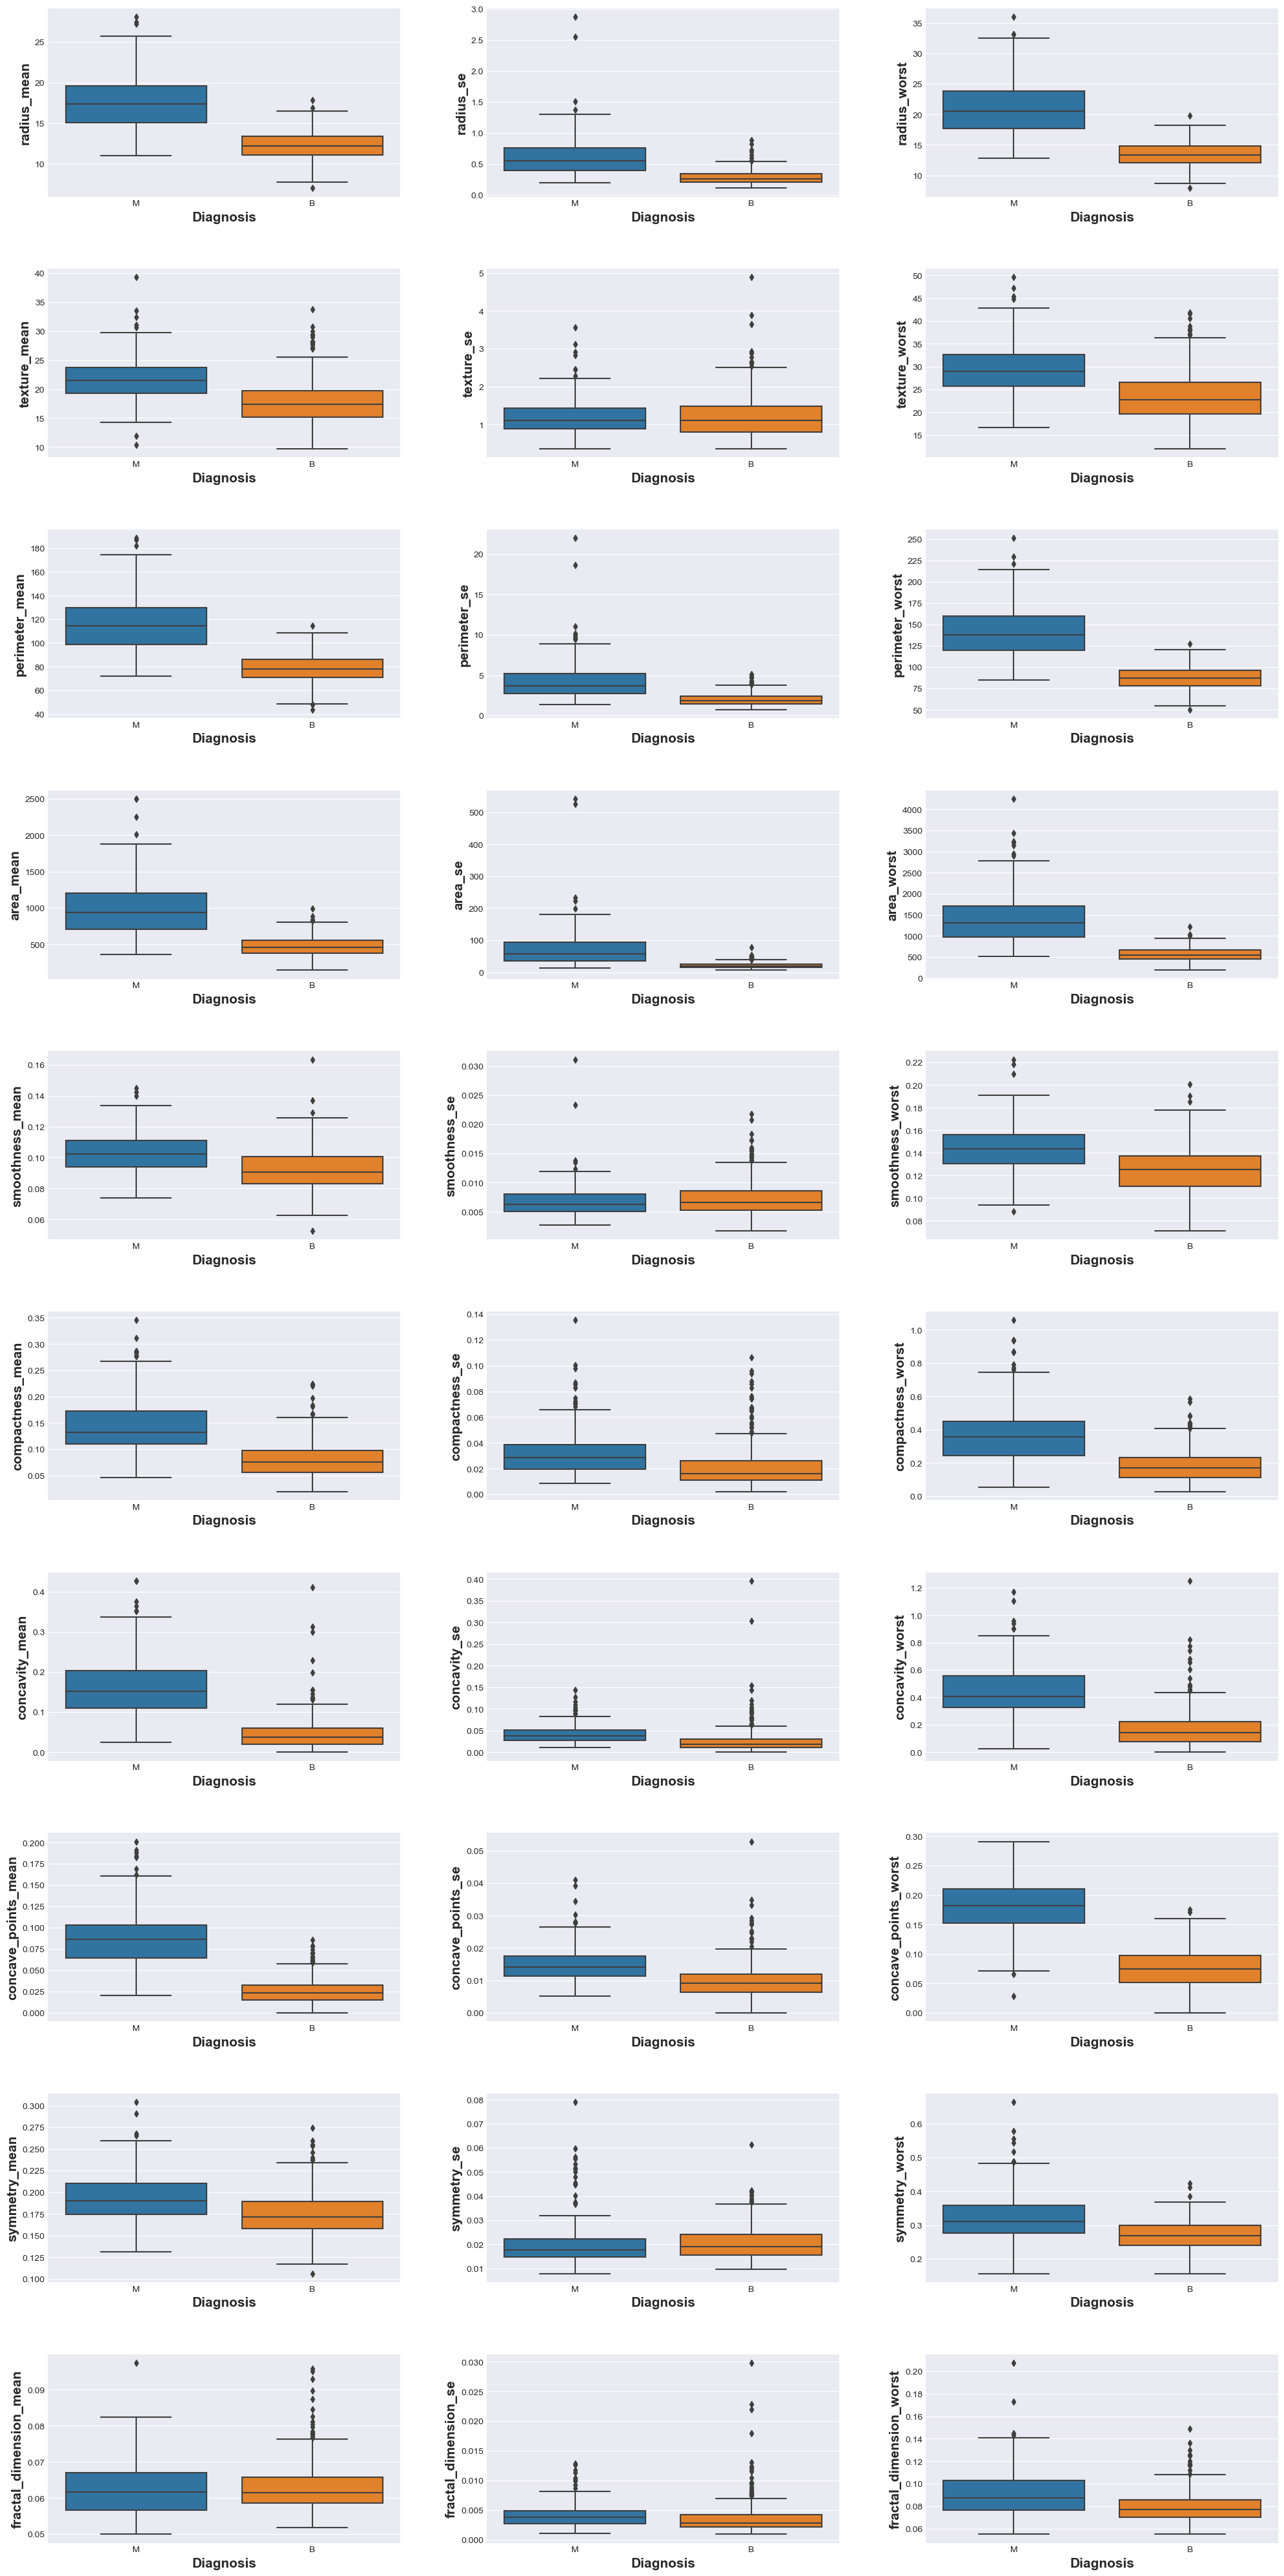

In [7]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=df_ordered, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

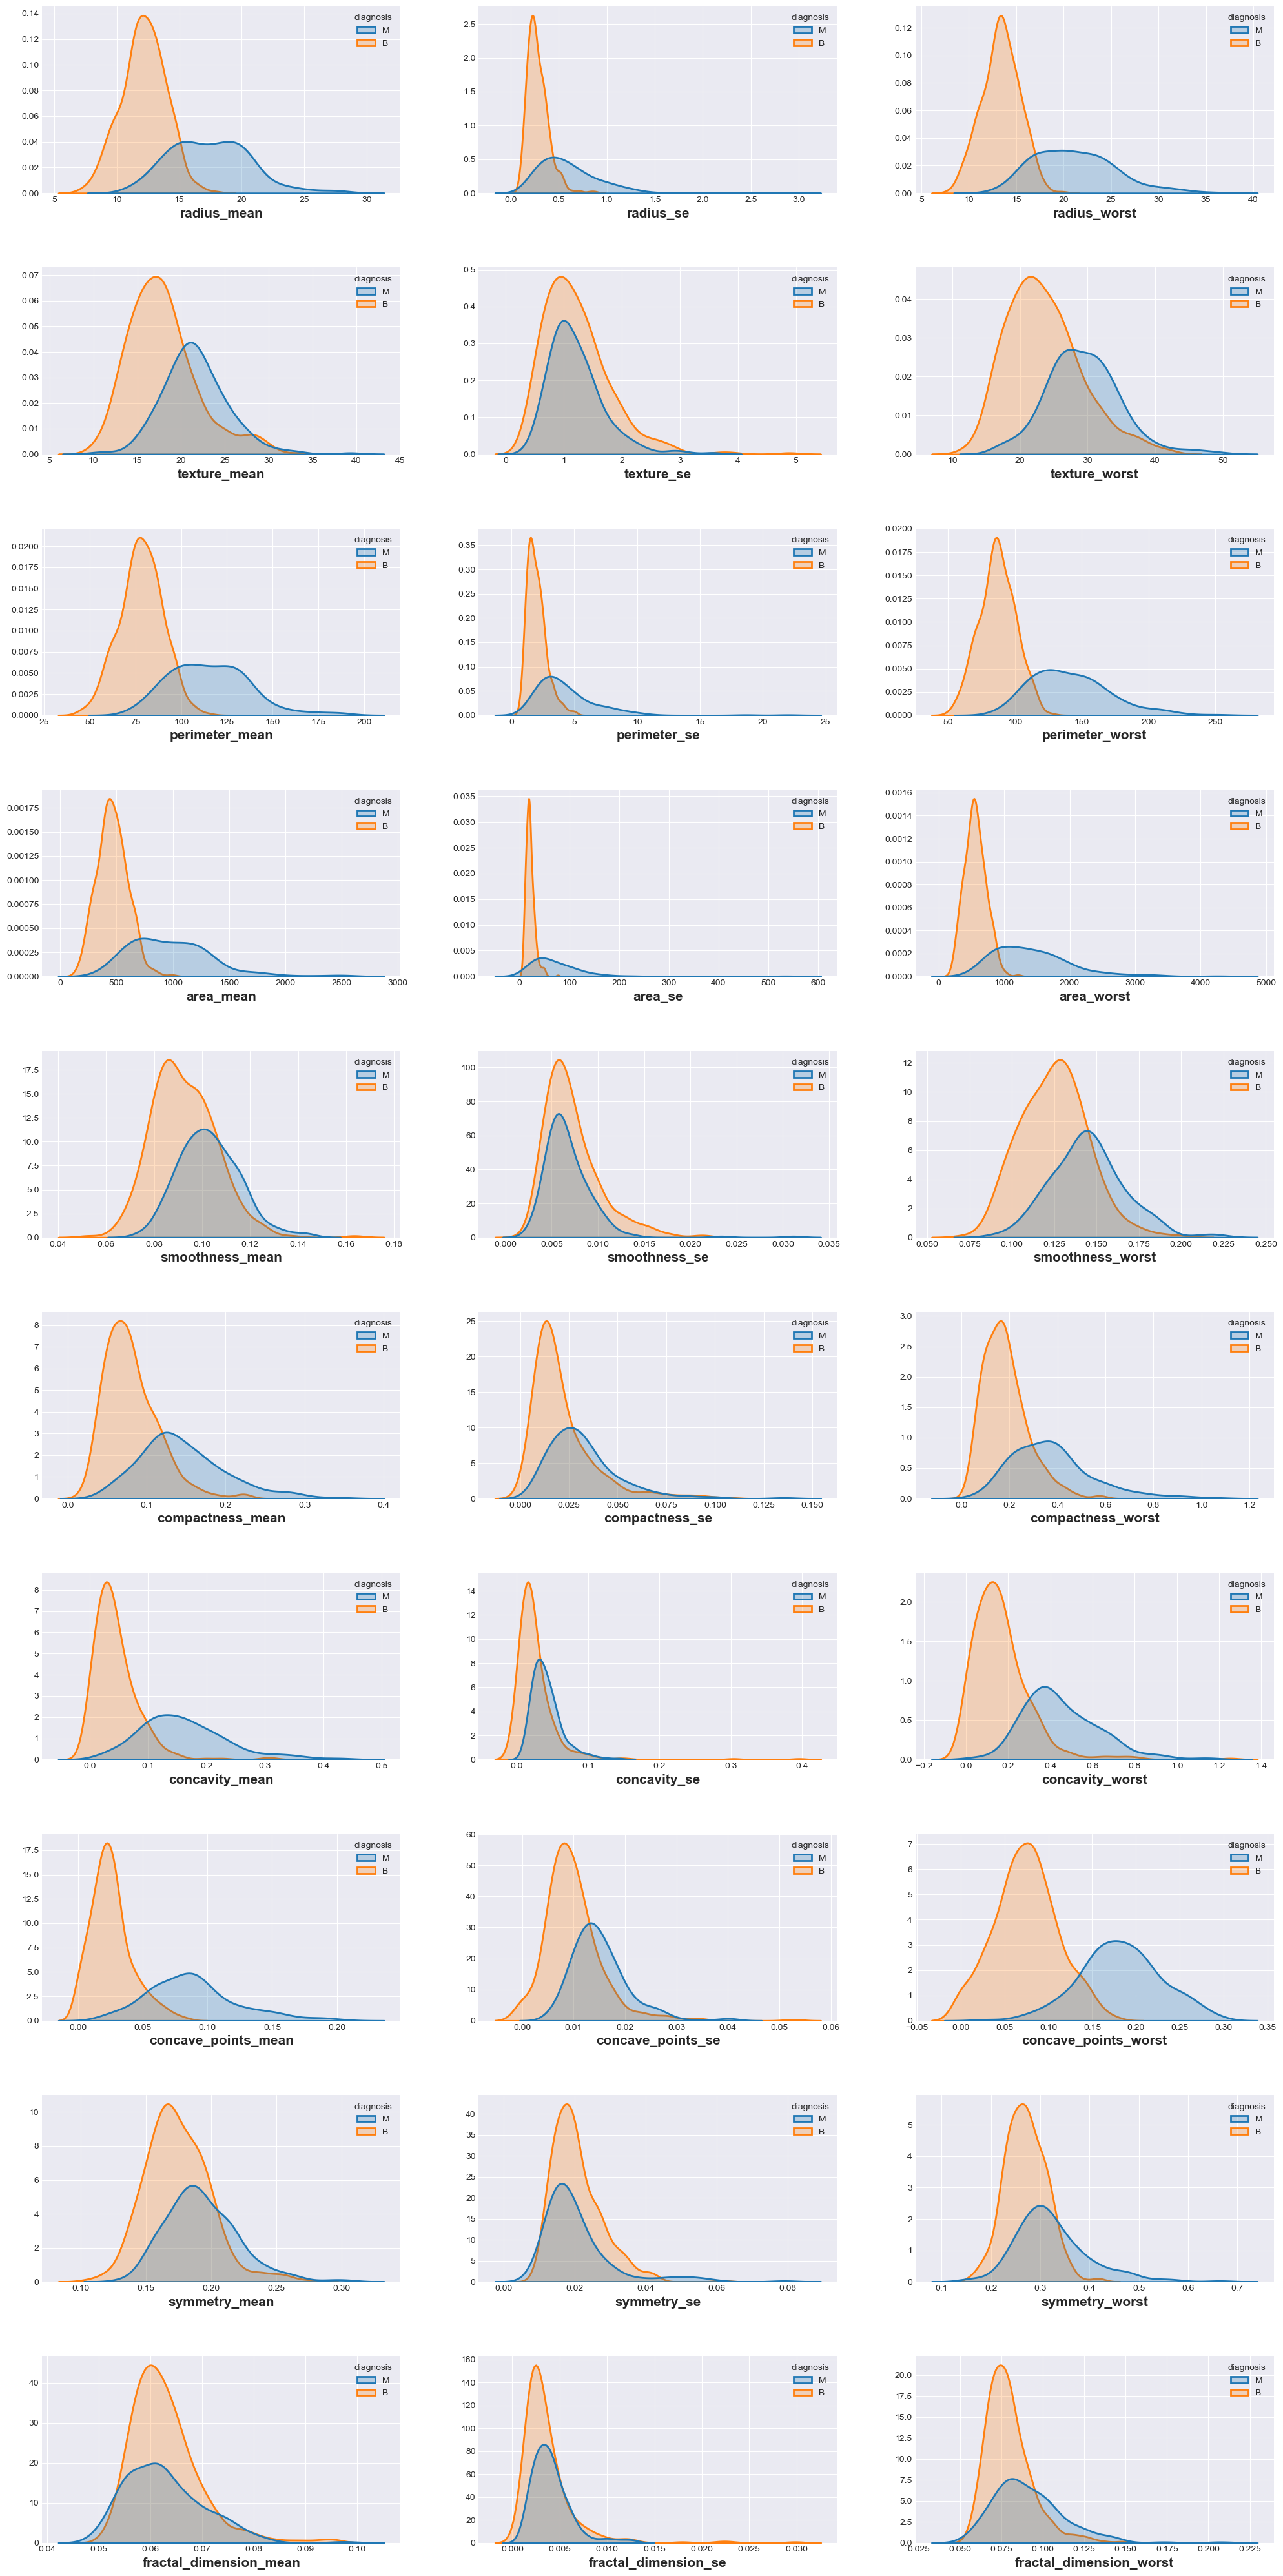

In [8]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.kdeplot(x=col, data=df_ordered, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

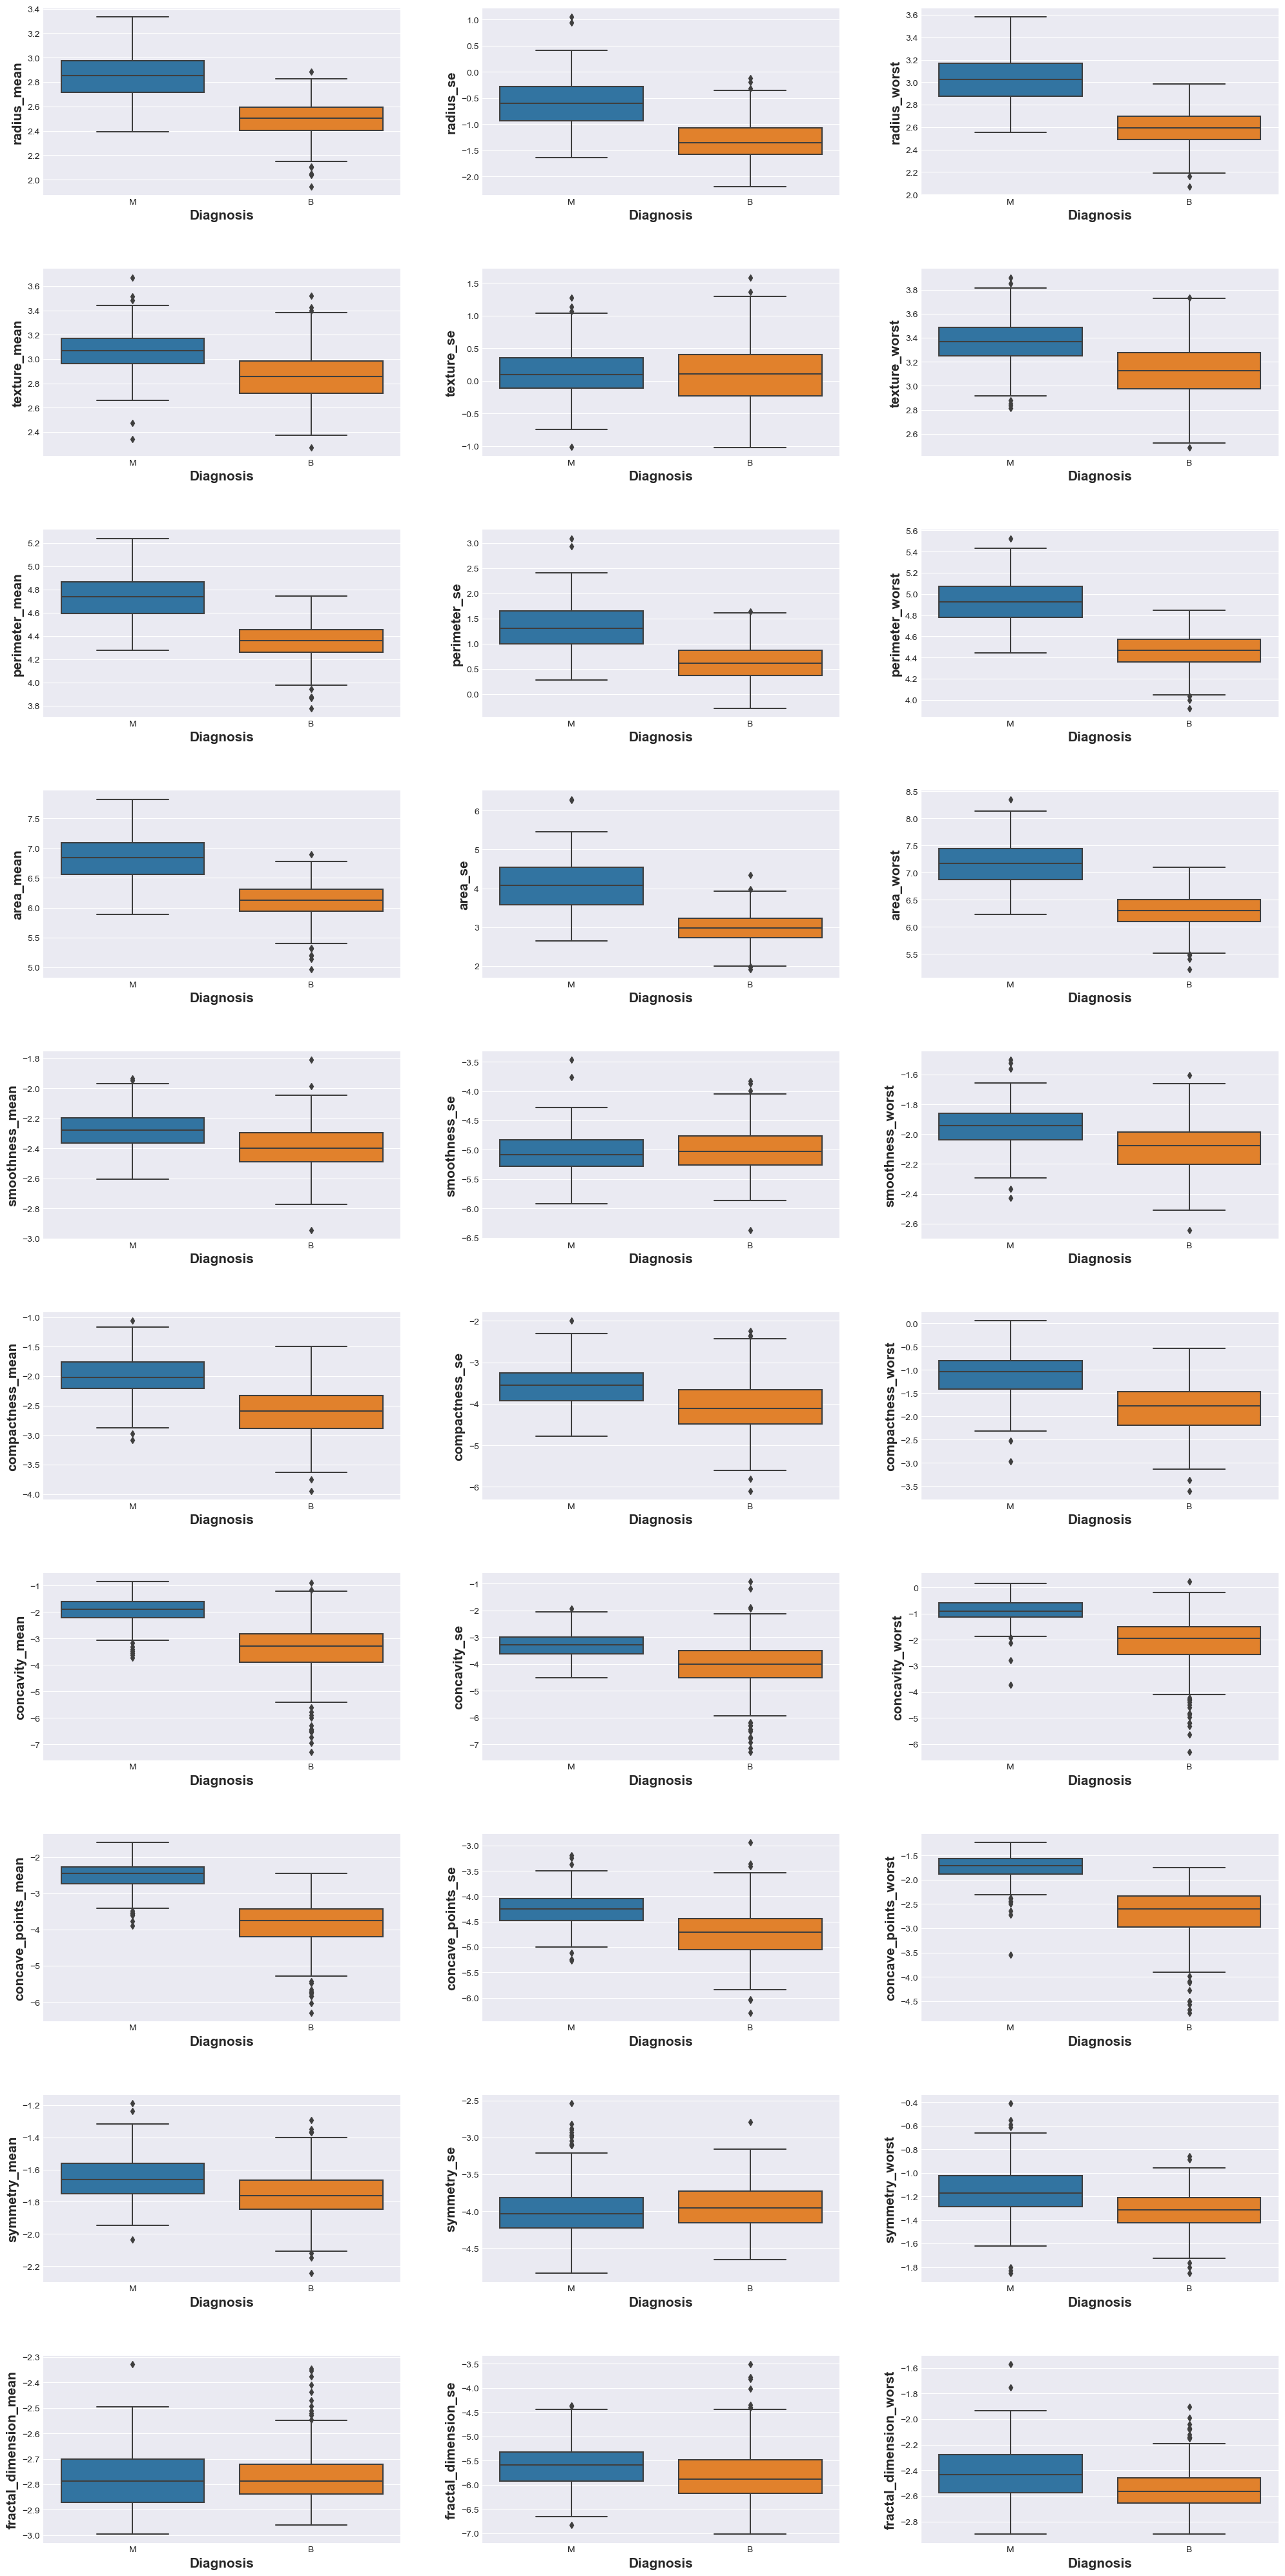

In [9]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    df_ordered[col] = np.log(df_ordered[col])
    sns.boxplot(x='diagnosis', y=col, data=df_ordered, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

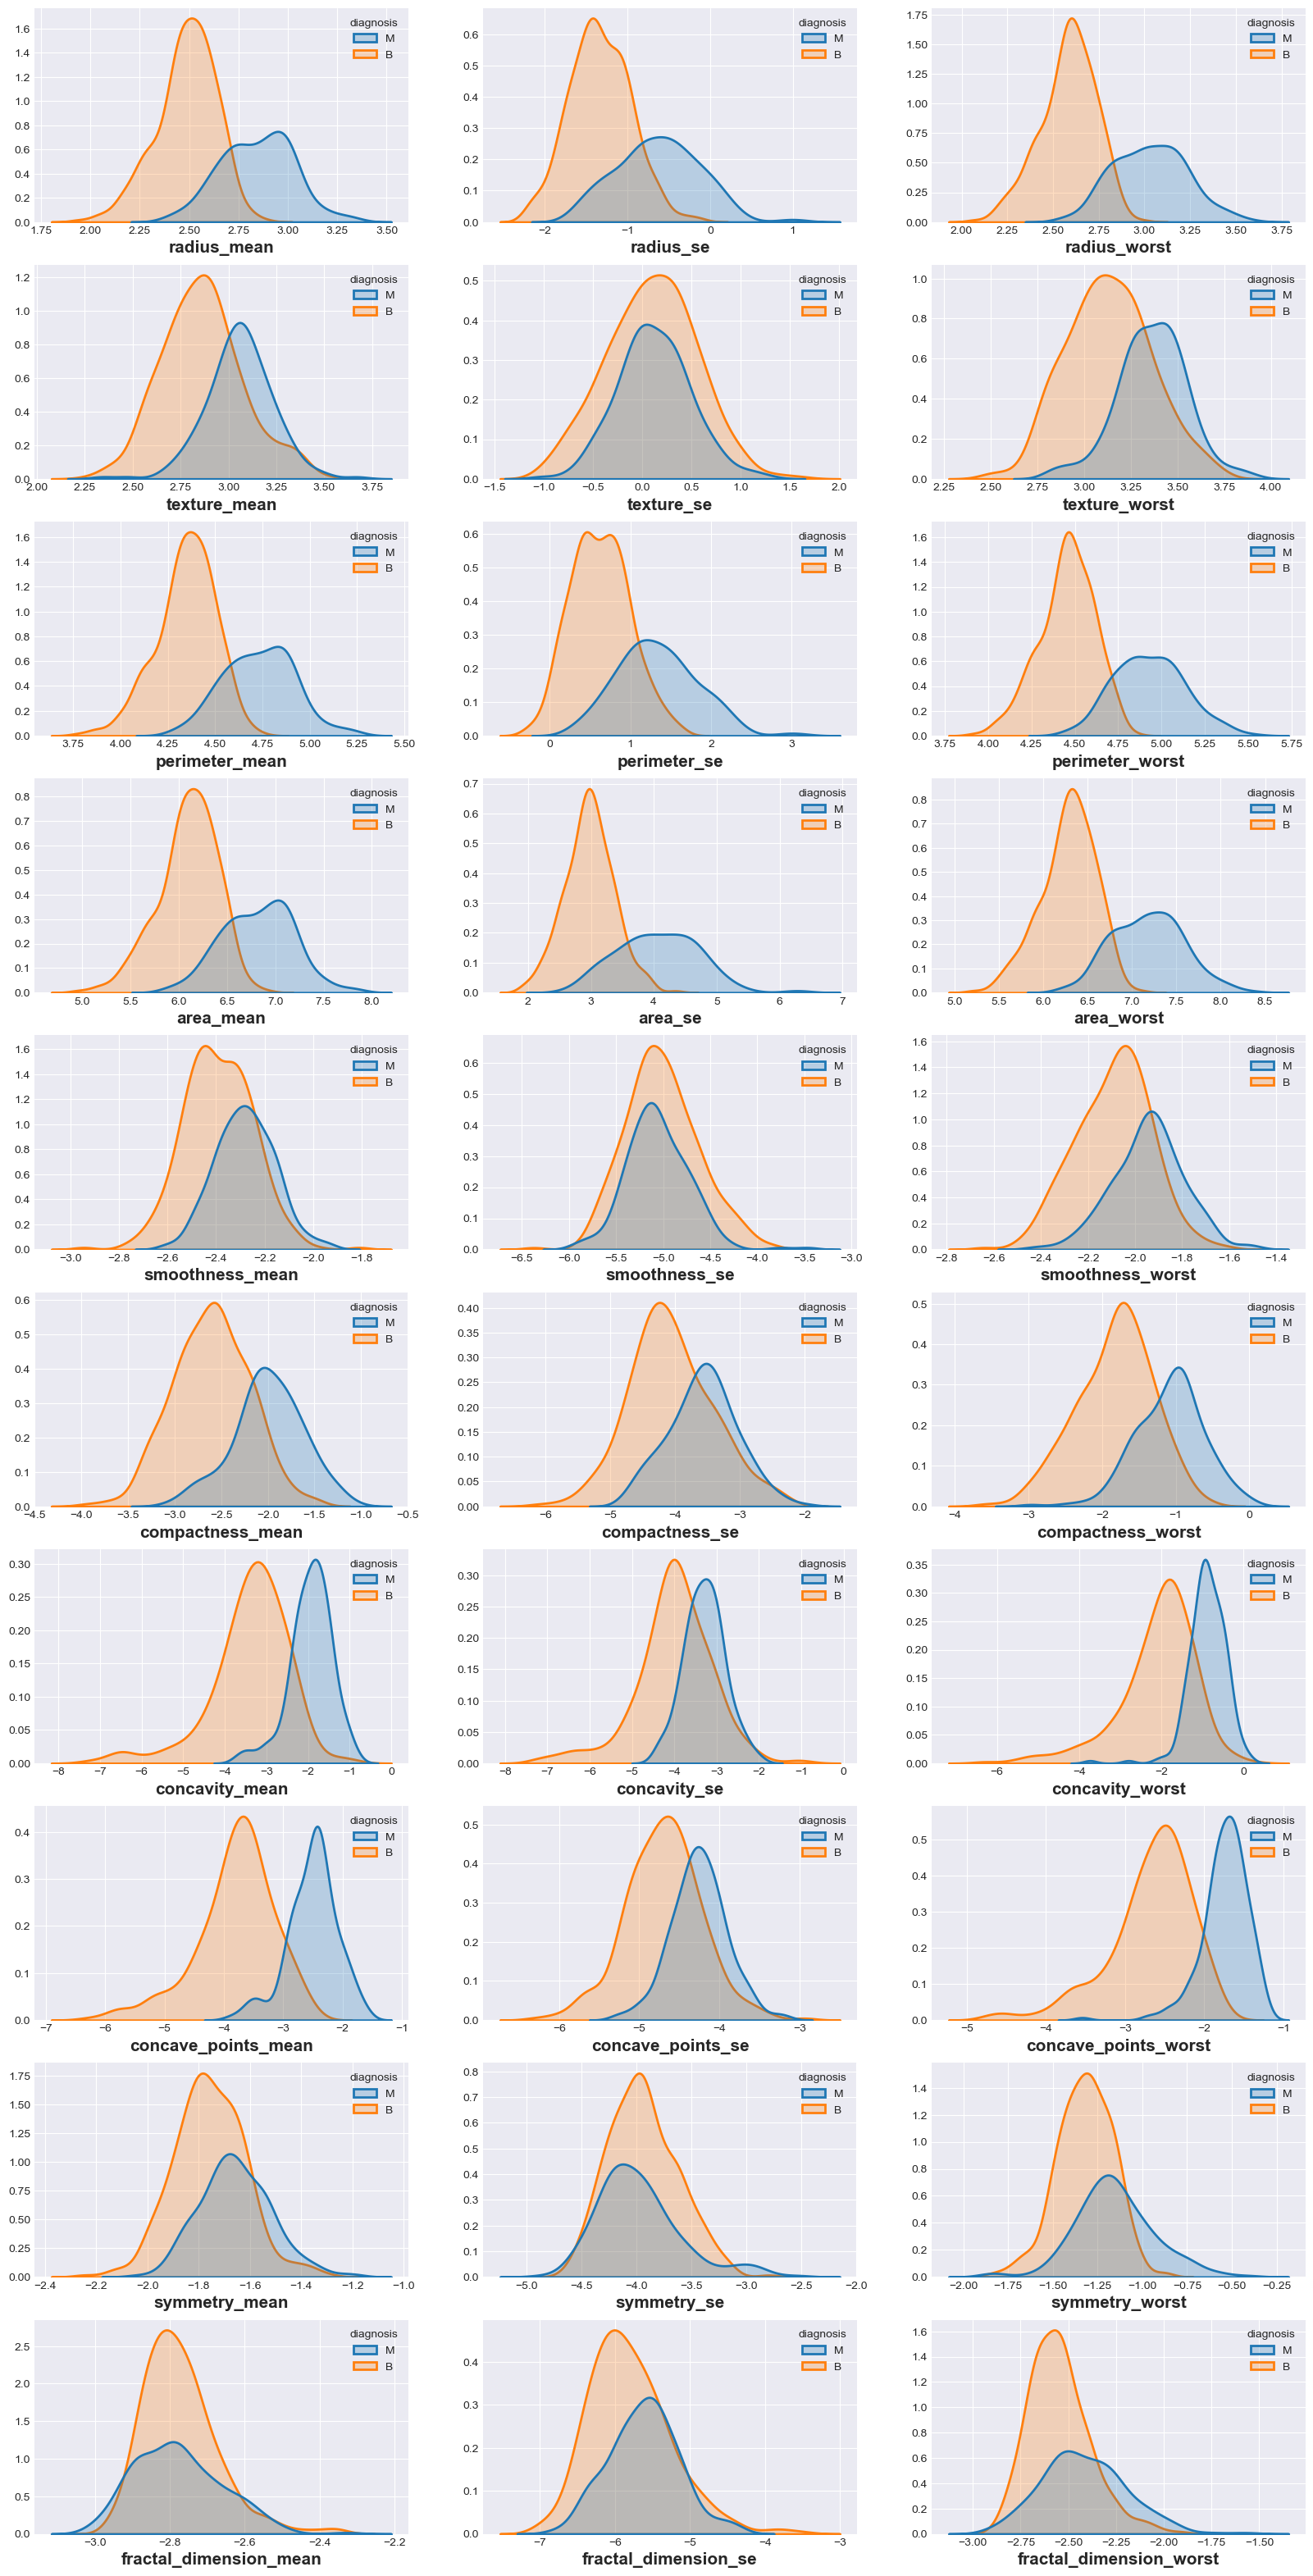

In [10]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df_ordered.columns[1:]):
    sns.kdeplot(x=col, data=df_ordered, ax=ax[i], fill=True, lw = 2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')

In [11]:
df_ordered.select_dtypes(include='number')

,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,area_se,area_worst,smoothness_mean,smoothness_se,smoothness_worst,compactness_mean,compactness_se,compactness_worst,concavity_mean,concavity_se,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,2.889816,0.090754,3.233961,2.339881,-0.099489,2.852439,4.810557,2.150482,5.218191,6.908755,5.033049,7.610358,-2.133687,-5.051614,-1.818925,-1.281574,-3.015119,-0.407066,-1.203640,-2.923784,-0.339818,-1.916643,-4.143325,-1.326517,-1.419231,-3.505558,-0.776311,-2.541985,-5.084336,-2.129472
1,3.023834,-0.609726,3.218476,2.877512,-0.309382,3.153163,4.889597,1.223187,5.067646,7.189922,4.305146,7.578657,-2.468168,-5.254300,-2.089088,-2.542875,-4.336671,-1.678788,-2.442997,-3.984594,-1.420472,-2.656834,-4.312501,-1.682009,-1.708154,-4.276586,-1.290984,-2.870510,-5.645891,-2.418894
2,2.980111,-0.293566,3.159975,3.056357,-0.239654,3.239854,4.867534,1.522790,5.027165,7.092574,4.543614,7.443664,-2.210918,-5.091303,-1.935168,-1.833207,-3.217377,-0.856843,-1.622523,-3.261783,-0.797619,-2.056507,-3.883436,-1.414694,-1.575520,-3.794240,-1.018047,-2.813577,-5.388023,-2.435203
3,2.435366,-0.701986,2.702032,3.014554,0.144966,3.277145,4.351310,1.236924,4.593806,5.956096,3.304319,6.341593,-1.948413,-4.698383,-1.561601,-1.259133,-2.595883,-0.143524,-1.421300,-2.871570,-0.375567,-2.251892,-3.980837,-1.356736,-1.348228,-2.819596,-0.409774,-2.328518,-4.687683,-1.754464
4,3.010128,-0.278128,3.115292,2.663053,-0.246796,2.813611,4.906015,1.693411,5.025195,7.167809,4.547965,7.362011,-2.299590,-4.466278,-1.984859,-2.018911,-3.704602,-1.584745,-1.619488,-2.866811,-0.916291,-2.260484,-3.971242,-1.817077,-1.709811,-4.042132,-1.442230,-2.833103,-5.275578,-2.566811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3.070840,0.162119,3.236716,3.108614,0.227932,3.273364,4.955827,2.037708,5.112590,7.299121,5.067016,7.614312,-2.198225,-4.575611,-1.958995,-2.155028,-3.543568,-1.554476,-1.410997,-2.956896,-0.889892,-1.974001,-3.707451,-1.506881,-1.756779,-4.497213,-1.579879,-2.878305,-5.463428,-2.642965
565,3.002211,-0.267226,3.165053,3.341093,0.901380,3.644144,4.876723,1.649235,5.043425,7.139660,4.595524,7.456455,-2.324831,-5.155257,-2.149006,-2.269150,-3.720164,-1.649219,-1.937942,-3.231455,-1.134758,-2.323707,-4.087568,-1.815233,-1.741827,-3.964369,-1.357901,-2.894440,-5.992265,-2.712510
566,2.809403,-0.784386,2.943386,3.335058,0.072321,3.529884,4.684905,1.231101,4.841822,6.754721,3.882594,7.024649,-2.470412,-5.132295,-2.172434,-2.279846,-3.288494,-1.173120,-2.380439,-3.051245,-1.077928,-2.937086,-4.162409,-1.953338,-1.838851,-4.329055,-1.505979,-2.873869,-5.548832,-2.548486
567,3.025291,-0.320205,3.248046,3.378611,0.466874,3.674273,4.942356,1.753019,5.218191,7.142827,4.456902,7.507141,-2.138767,-5.032574,-1.801810,-1.283738,-2.787418,-0.141448,-1.045830,-2.642684,-0.063259,-1.883875,-4.095946,-1.328025,-1.428367,-3.761880,-0.894774,-2.656977,-5.085628,-2.087474


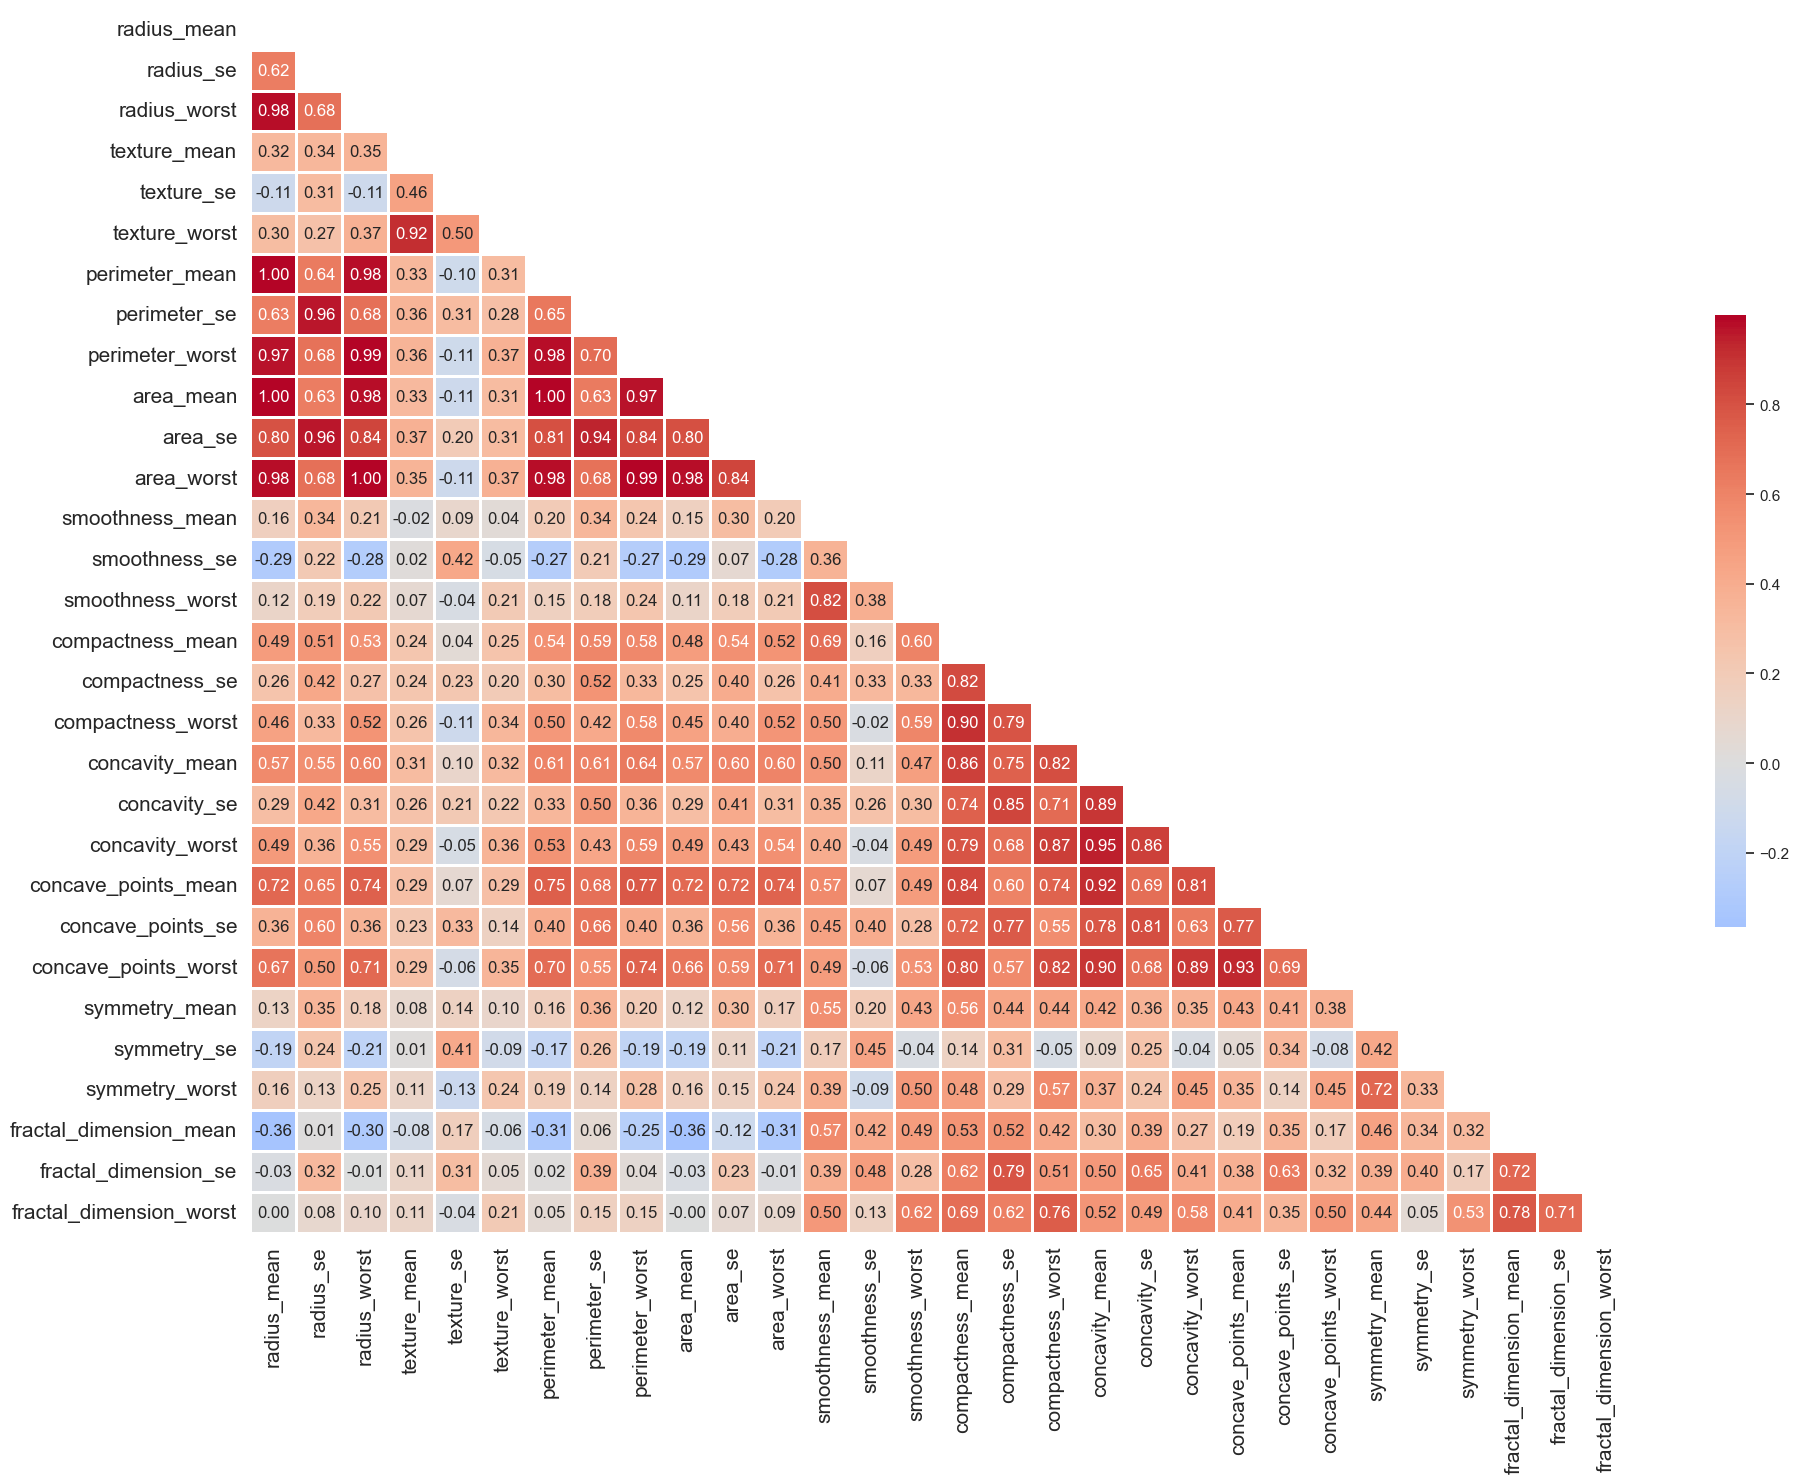

In [12]:
sns.set_theme(style="white")

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df_ordered.corr(), dtype=bool))
ax = sns.heatmap(df_ordered.corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)
    
plt.tight_layout()
plt.show()

As you can see, we can't make use of it so much.

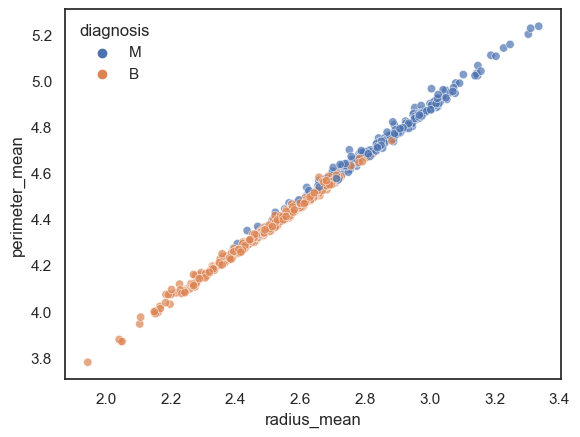

In [13]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df_ordered, hue='diagnosis', alpha=0.7);

# Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.9590643274853801


So with a simple model with 5 neighbors, we got 95% accuracy. Let's see if we can improve it.

In [15]:
n_neighbors = list(range(1, 31))
scores = []

x = scaler.fit_transform(X)

for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    scores.append(score.mean())
    

Text(0, 0.5, 'Accuracy Score')

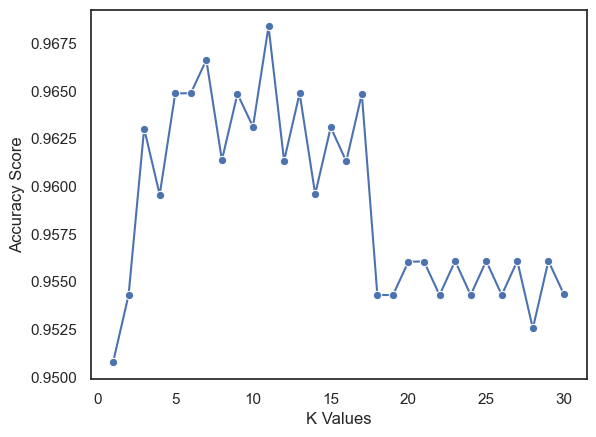

In [16]:
sns.lineplot(x = n_neighbors, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [17]:
best_k = n_neighbors[scores.index(max(scores))]
best_k

11

In [18]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9707602339181286

              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<AxesSubplot:>

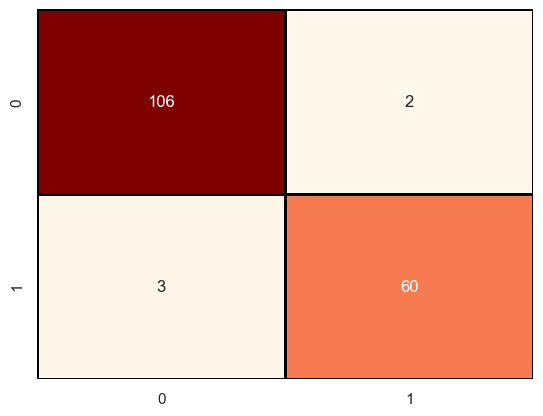

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='OrRd', fmt='d', cbar=False, linewidths=1, linecolor='black')

So our final model scored accuracy of 97% and it misclassified 5 samples.

Thank you for reading this notebook. If you have any questions or suggestions, feel free to leave a comment.

And of course an upvote if you find it useful 🥰.